# 准备数据

In [1]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [2]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [3]:
# 设置任务参数
name = "101"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [4]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [5]:
# 加载模块
from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import AlphaDataset
from vnpy.alpha.dataset.datasets.alpha_101 import Alpha101

In [6]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [7]:
df.head()

datetime,open,high,low,close,volume,turnover,open_interest,vwap,vt_symbol
datetime[μs],f32,f32,f32,f32,f32,f32,f32,f32,str
2007-09-24 00:00:00,1.006286,1.048397,0.986799,1.0,3.2038352e7,4.97512736e8,0.0,15.528662,"""000767.SZSE"""
2007-09-25 00:00:00,0.99811,0.99811,0.940285,0.94783,1.7040344e7,2.50261696e8,0.0,14.686423,"""000767.SZSE"""
2007-09-26 00:00:00,0.949714,0.966688,0.930233,0.930863,9.123894e6,1.31241208e8,0.0,14.384342,"""000767.SZSE"""
2007-09-27 00:00:00,0.929603,0.942805,0.9252,0.936519,6753563.5,9.6265552e7,0.0,14.254039,"""000767.SZSE"""
2007-09-28 00:00:00,0.944058,0.973604,0.944058,0.952856,1.1872106e7,1.7358256e8,0.0,14.621042,"""000767.SZSE"""


In [8]:
# 创建数据集对象
dataset: AlphaDataset = Alpha101(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [9]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)


In [10]:
# 准备特征和标签数据
dataset.prepare_data(filters)

2025-07-09 23:06:01 开始计算表达式因子特征


100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

2025-07-09 23:06:07 开始合并结果数据因子特征



0it [00:00, ?it/s]

2025-07-09 23:06:07 开始筛选成分股数据



100%|██████████| 819/819 [00:09<00:00, 84.64it/s]


In [11]:
dataset.raw_df

datetime,vt_symbol,alpha101,label
datetime[μs],str,f32,f32
2008-01-02 00:00:00,"""000001.SZSE""",-0.461124,0.048723
2008-01-02 00:00:00,"""000002.SZSE""",0.1477,0.059317
2008-01-02 00:00:00,"""000009.SZSE""",0.244166,-0.022241
2008-01-02 00:00:00,"""000012.SZSE""",0.399498,0.058878
2008-01-02 00:00:00,"""000021.SZSE""",0.832549,0.018523
…,…,…,…
2023-12-29 00:00:00,"""688363.SSE""",-0.519716,-0.019187
2023-12-29 00:00:00,"""688396.SSE""",0.14973,-0.011668
2023-12-29 00:00:00,"""688561.SSE""",-0.109459,-0.037323


c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns

Dropped 3.7% entries from factor data: 0.4% in forward returns computation and 3.3% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-0.999858,0.600070,-0.597542,0.295943,197464,10.275491
2.0,-0.992148,0.715449,-0.400658,0.332939,193206,10.053916
3.0,-0.977317,0.775739,-0.270772,0.355297,193446,10.066405
4.0,-0.948677,0.812398,-0.161370,0.364231,193079,10.047307
5.0,-0.929031,0.846174,-0.055334,0.363520,193216,10.054436
6.0,-0.908102,0.878008,0.052181,0.355812,190789,9.928142
7.0,-0.881740,0.906076,0.167552,0.339314,189582,9.865333
8.0,-0.848810,0.944820,0.294160,0.311586,189332,9.852323
9.0,-0.793043,0.975805,0.442512,0.271517,190204,9.897700


Returns Analysis


,1D,5D,10D
Ann. alpha,0.127,-0.023,-0.004
beta,-0.043,-0.028,-0.011
Mean Period Wise Return Top Quantile (bps),11.180,-2.421,-1.077
Mean Period Wise Return Bottom Quantile (bps),-11.602,-1.199,-1.026
Mean Period Wise Spread (bps),22.782,-1.227,-0.037


<Figure size 640x480 with 0 Axes>

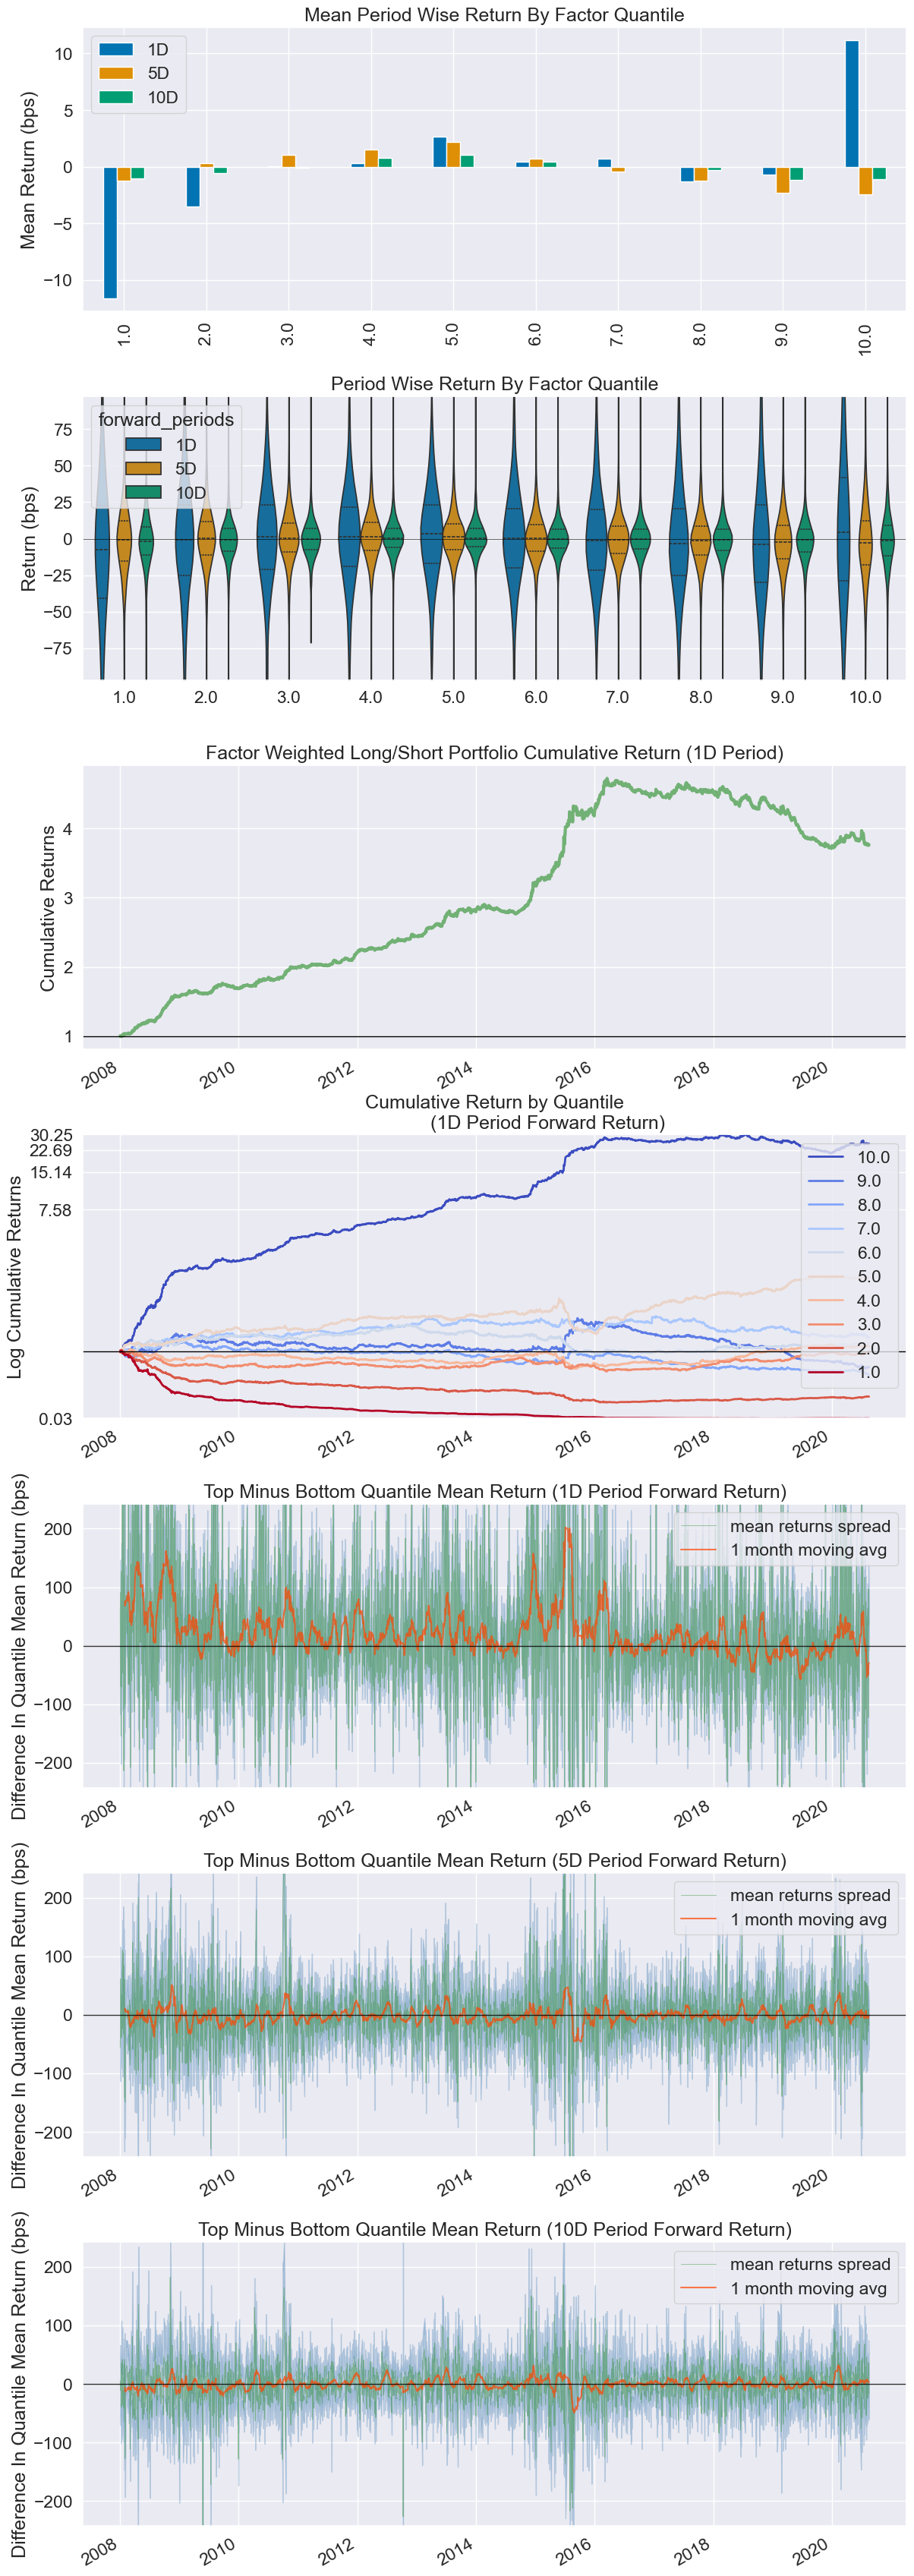

Information Analysis


,1D,5D,10D
IC Mean,-0.017,-0.019,-0.007
IC Std.,0.149,0.135,0.128
Risk-Adjusted IC,-0.115,-0.142,-0.055
t-stat(IC),NaN,NaN,NaN
p-value(IC),NaN,NaN,NaN
IC Skew,NaN,NaN,NaN
IC Kurtosis,NaN,NaN,NaN


c:\veighna_studi\Lib\site-packages\alphalens\performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


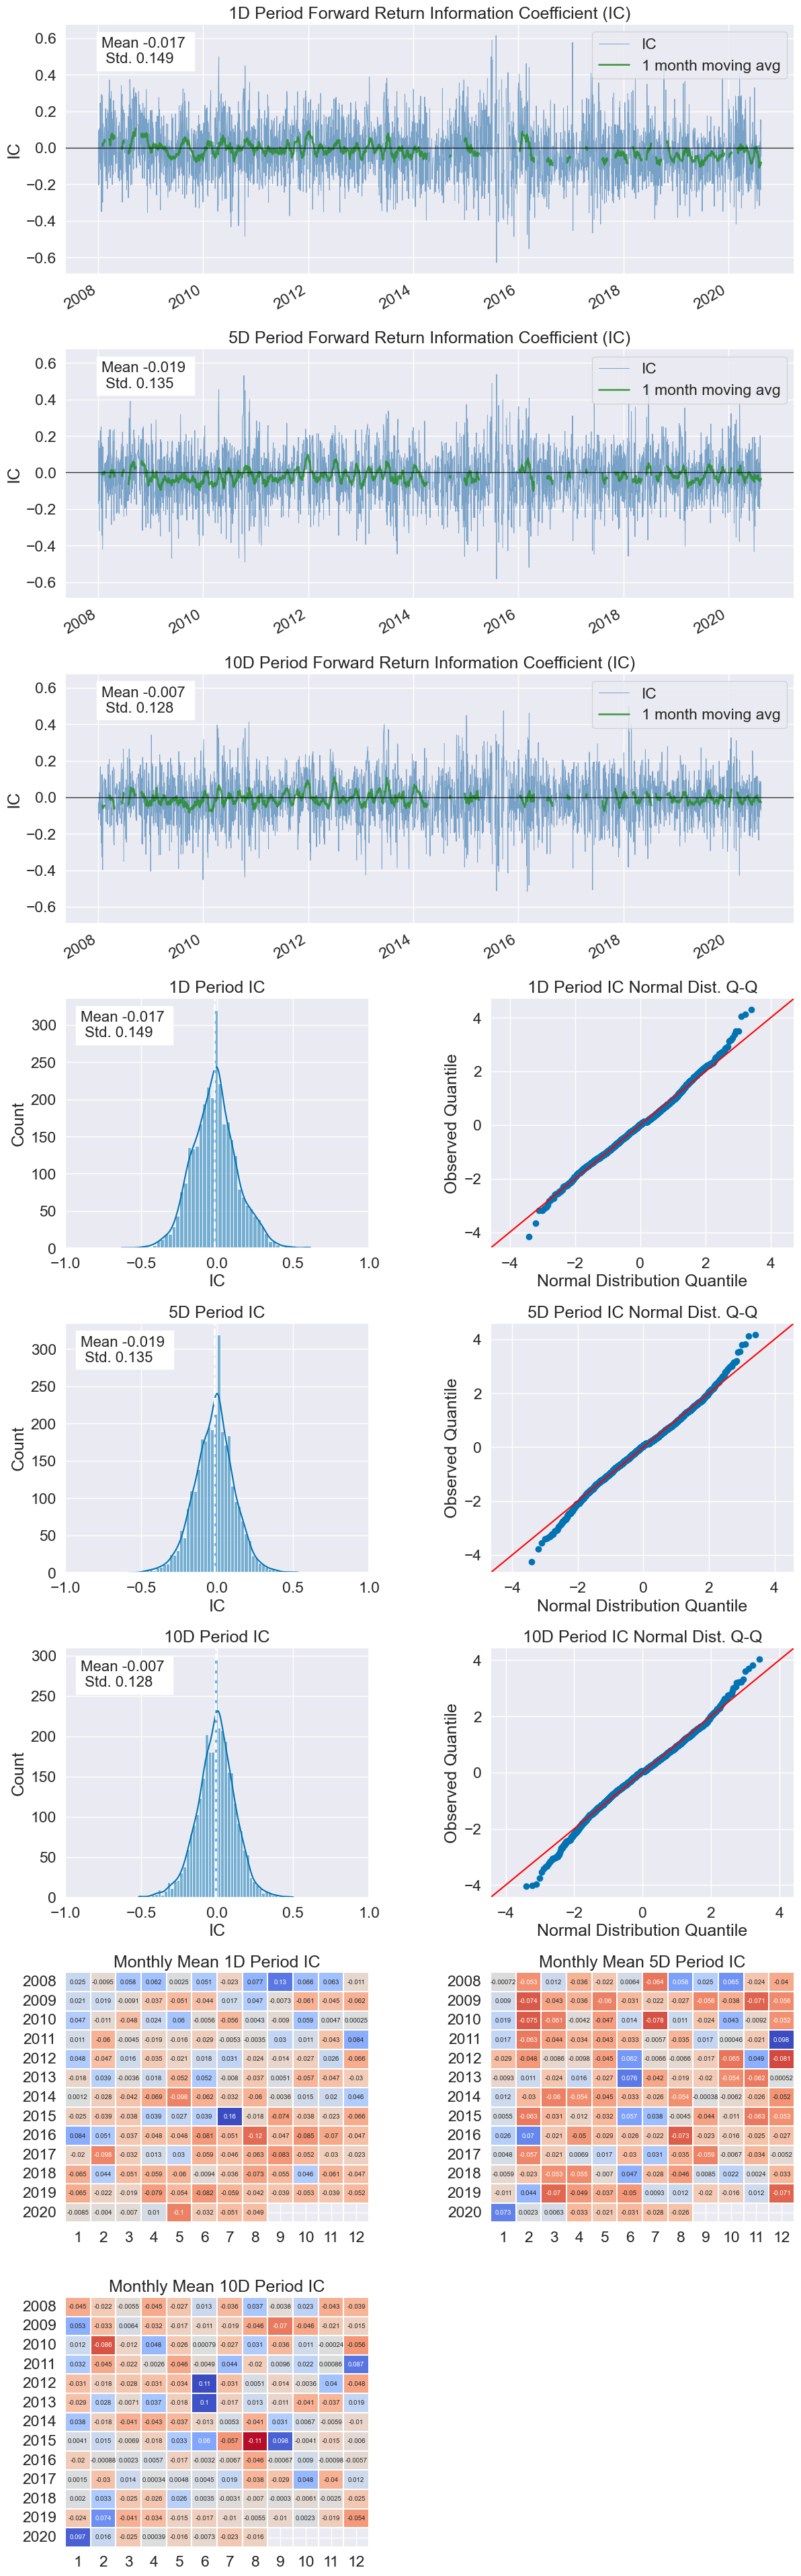

c:\veighna_studi\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1.0 Mean Turnover,0.886,0.888,0.885
Quantile 2.0 Mean Turnover,0.903,0.900,0.897
Quantile 3.0 Mean Turnover,0.900,0.899,0.898
Quantile 4.0 Mean Turnover,0.898,0.898,0.898
Quantile 5.0 Mean Turnover,0.894,0.896,0.896
Quantile 6.0 Mean Turnover,0.899,0.898,0.897
Quantile 7.0 Mean Turnover,0.901,0.899,0.900
Quantile 8.0 Mean Turnover,0.905,0.904,0.901
Quantile 9.0 Mean Turnover,0.902,0.902,0.898
Quantile 10.0 Mean Turnover,0.883,0.891,0.884


,1D,5D,10D
Mean Factor Rank Autocorrelation,-0.01,-0.016,0.006


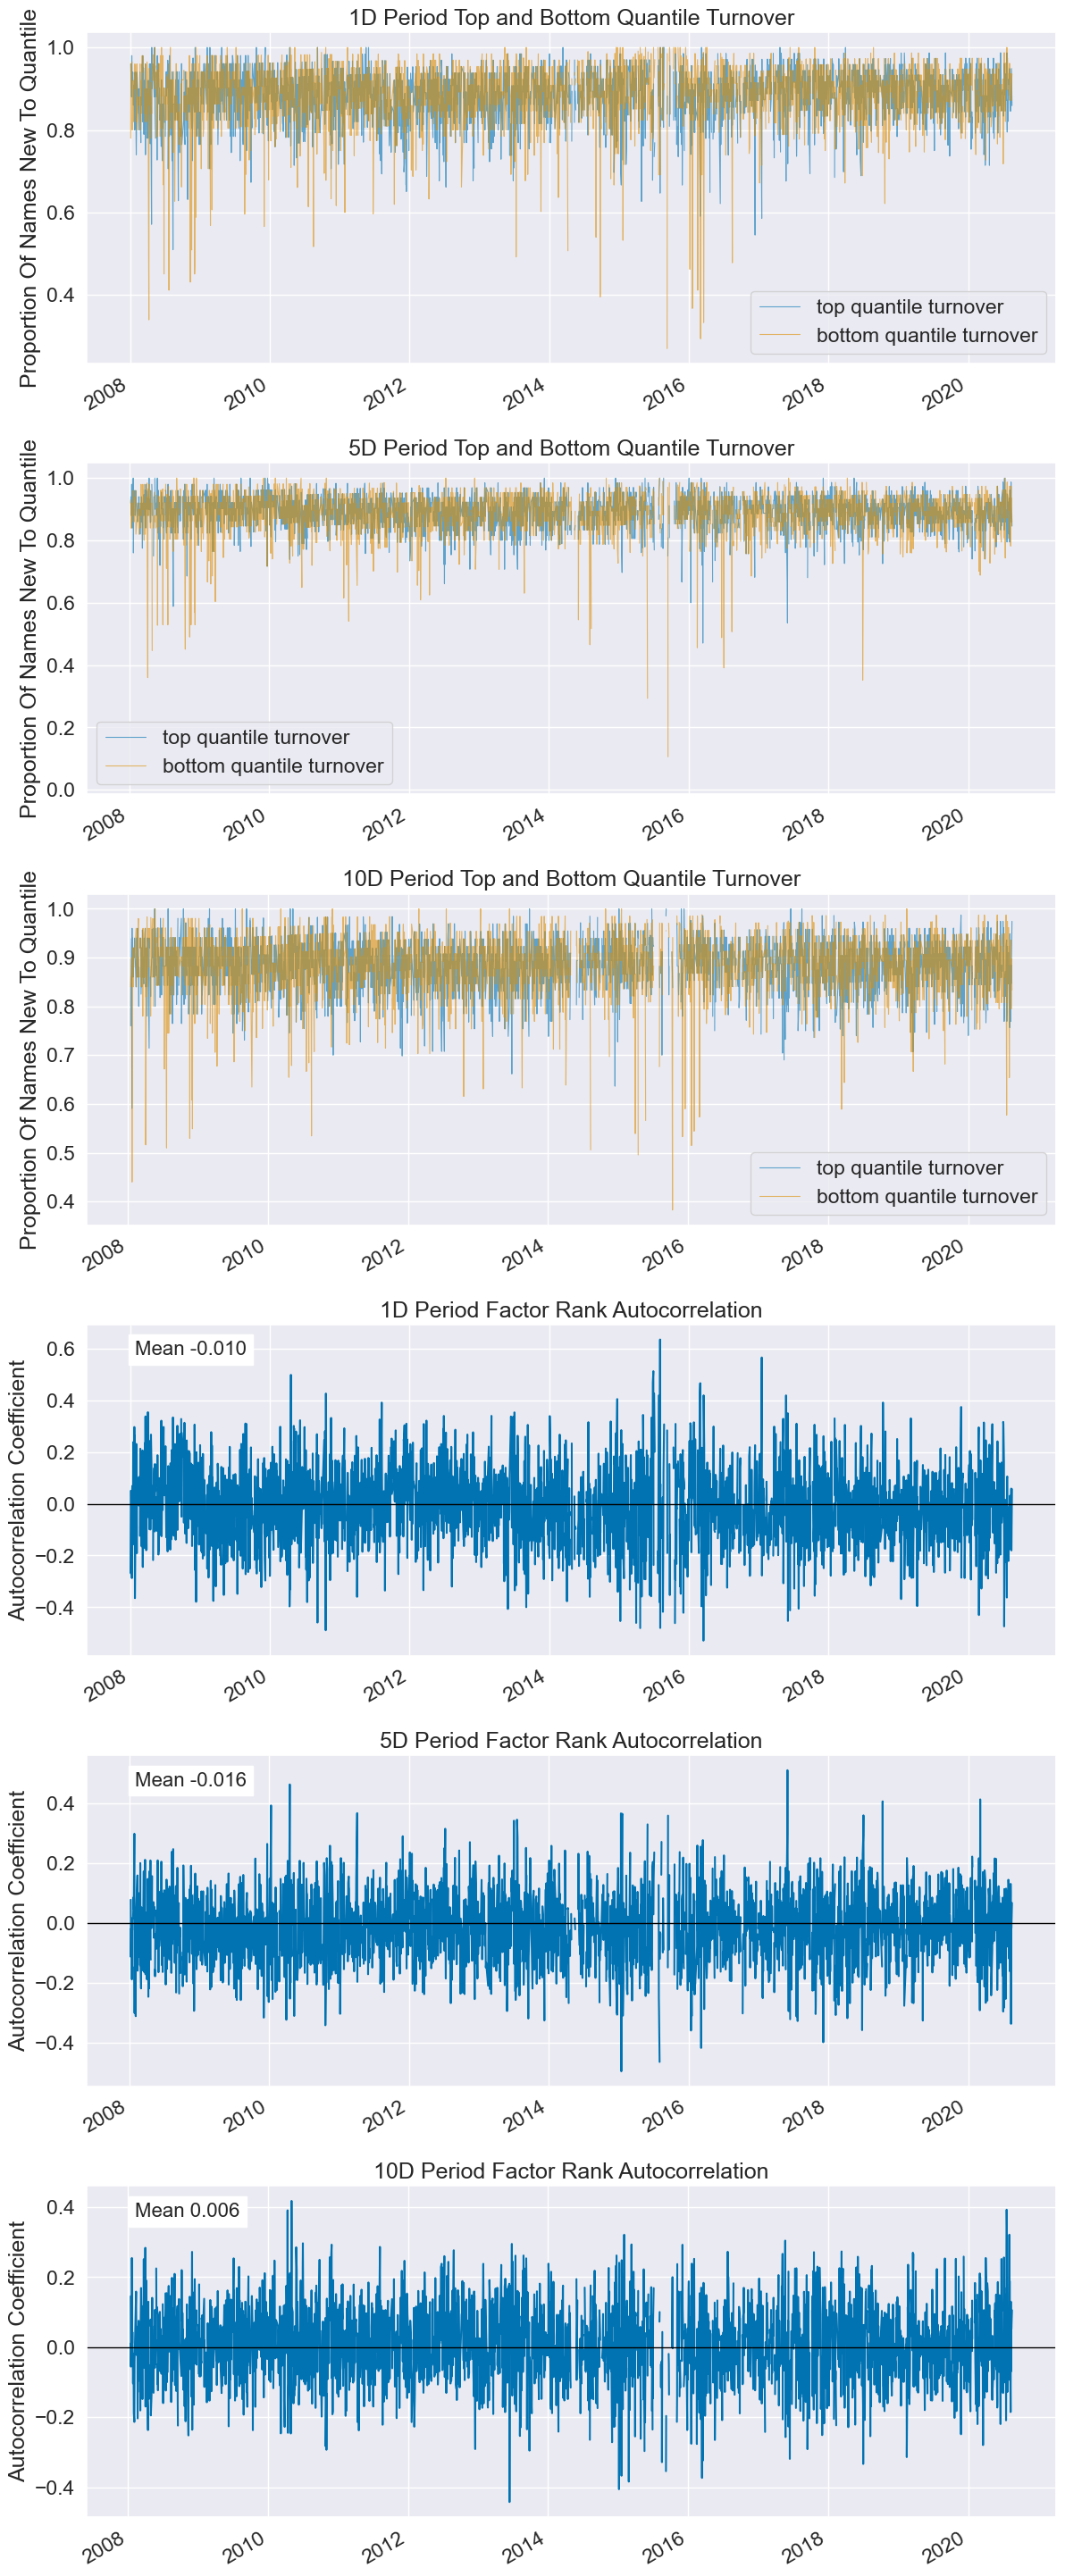

In [13]:
# 特征表现分析
dataset.show_feature_performance("alpha101")